# 仿照Kibana上的样例飞行数据Dashboard进行数据可视化分析

In [1]:
import wordcloud; import matplotlib.pyplot as plt; import seaborn as sns

In [2]:
import pandas as pd; import numpy as np

In [3]:
pd.set_option('display.max_columns', 500)

源数据在ELK安装好之后在Kibana生成的，我再通过Logstash导出csv文件，文件里包含13059条飞行数据，由pandas读取后生成时间序列dataframe
在Kibana上看到的大概是这样子吧👇👇👇
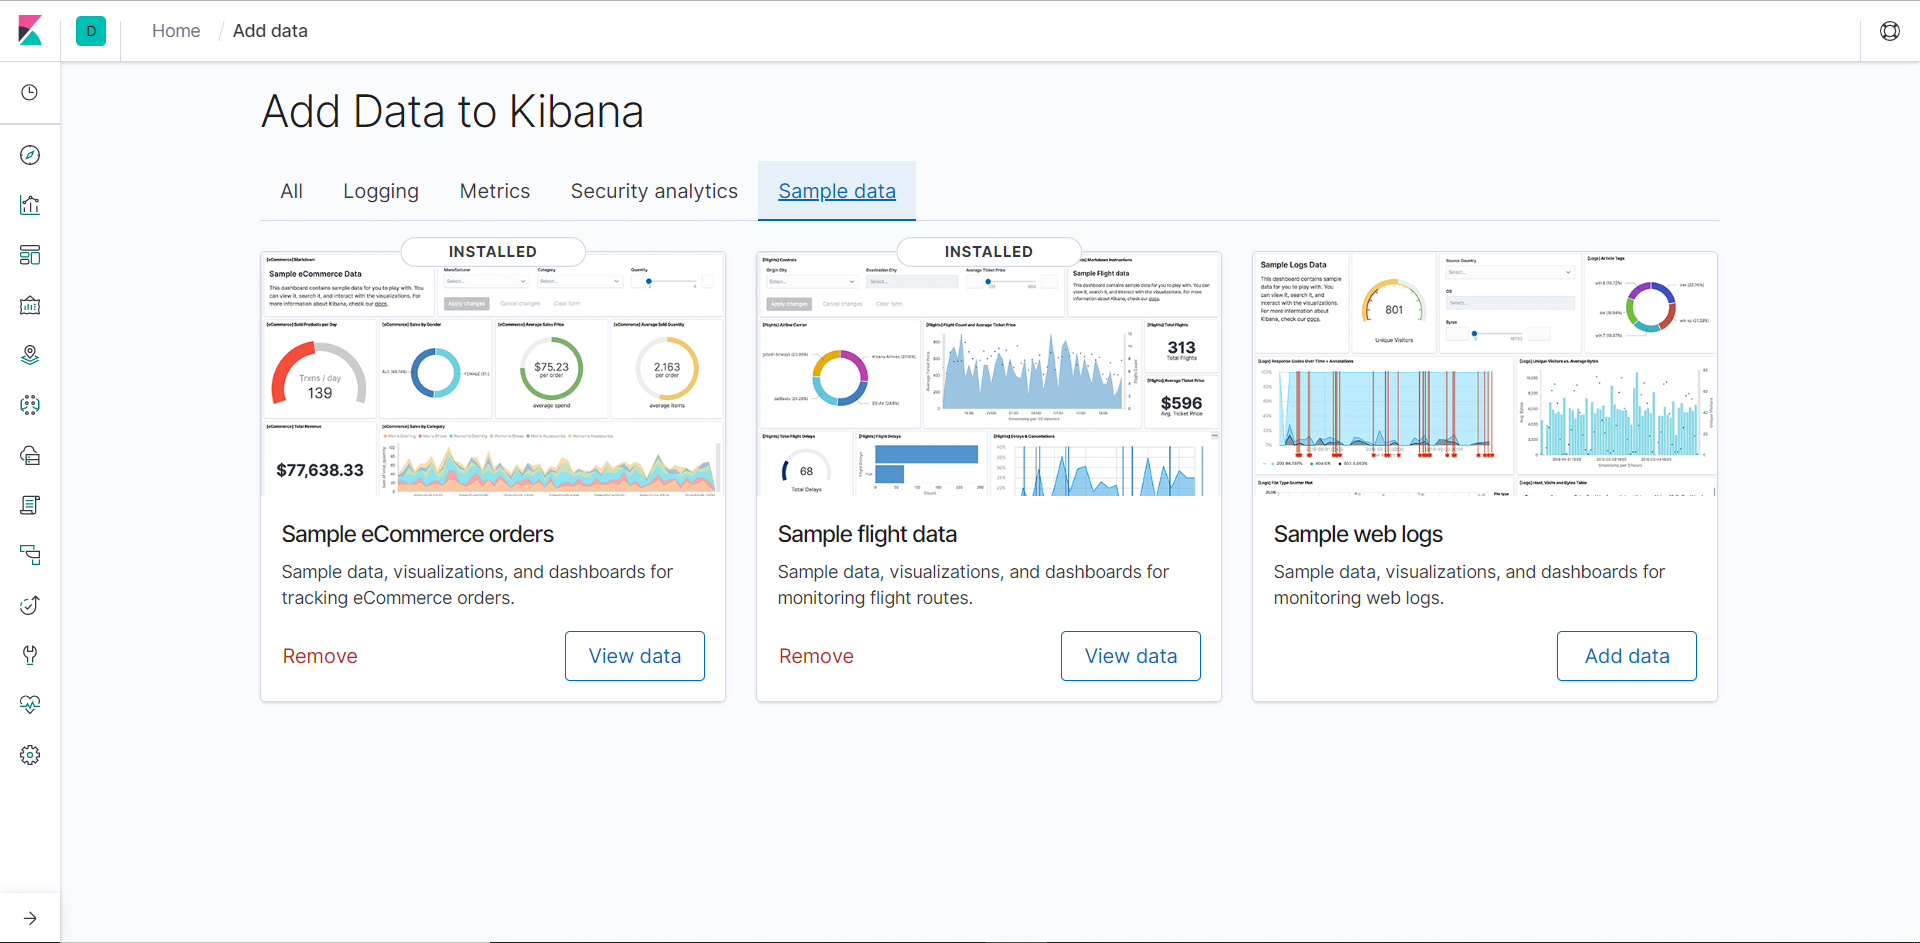
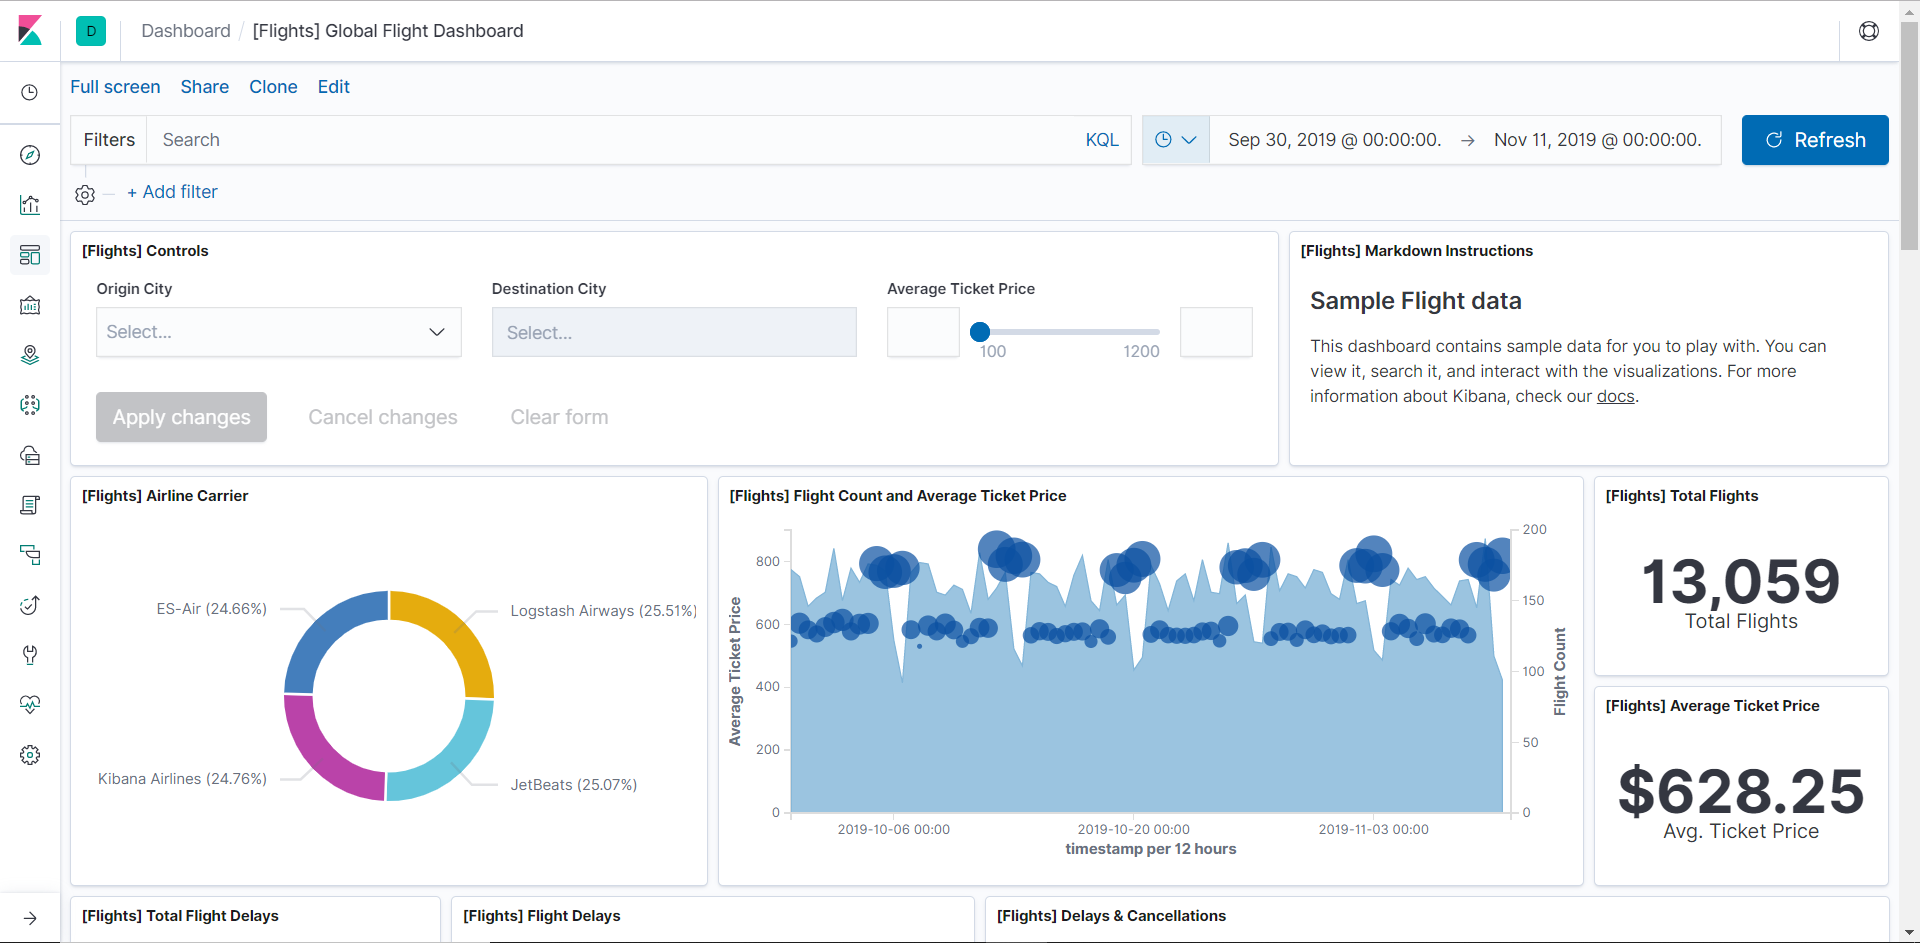

读取csv文件

In [4]:
csv_fields = ["AvgTicketPrice", "Cancelled", "Carrier", "Dest", "DestAirportID", "DestCityName", "DestCountry", "DestLocation", "DestRegion", "DestWeather", "DistanceKilometers", "DistanceMiles", "FlightDelay", "FlightDelayMin", "FlightDelayType", "FlightNum", "FlightTimeHour", "FlightTimeMin", "Origin", "OriginAirportID", "OriginCityName", "OriginCountry", "OriginLocation", "OriginRegion", "OriginWeather", "dayOfWeek", "hour_of_day", "timestamp"]

In [5]:
df = pd.read_csv('D:/datasets/flight-data-output/flight-output.csv', names=csv_fields, parse_dates=['timestamp'], encoding='gbk')

In [6]:
df.drop(columns=['hour_of_day'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityN

In [8]:
df.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,DistanceKilometers,DistanceMiles,FlightDelay,FlightDelayMin,FlightDelayType,FlightNum,FlightTimeHour,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
0,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{""lat"":""-33.94609833"",""lon"":""151.177002""}",SE-BD,Rain,16492.326650,10247.856680,False,0,No Delay,9HY9SWR,17.179507,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{""lat"":""50.033333"",""lon"":""8.570556""}",DE-HE,Sunny,0,2019-09-30 00:00:00
1,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Sunny,8823.400140,5482.606665,False,0,No Delay,X98CCZO,7.739825,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{""lat"":""-33.96480179"",""lon"":""18.60169983""}",SE-BD,Clear,0,2019-09-30 18:27:00
2,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Cloudy,0.000000,0.000000,False,0,No Delay,UFK2WIZ,0.000000,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Rain,0,2019-09-30 17:11:14
3,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{""lat"":""45.648399"",""lon"":""12.1944""}",IT-34,Clear,555.737767,345.319439,True,180,Weather Delay,EAYQW69,3.712484,222.749059,Naples International Airport,NA01,Naples,IT,"{""lat"":""40.886002"",""lon"":""14.2908""}",IT-72,Thunder & Lightning,0,2019-09-30 10:33:28
4,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{""lat"":""34.447102"",""lon"":""108.751999""}",SE-BD,Clear,13358.244200,8300.428125,False,0,No Delay,58U013N,13.096318,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{""lat"":""19.4363"",""lon"":""-99.072098""}",MX-DIF,Damaging Wind,0,2019-09-30 05:13:00


In [9]:
timedf = df.set_index('timestamp', drop=True)

In [10]:
timedf.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,DistanceKilometers,DistanceMiles,FlightDelay,FlightDelayMin,FlightDelayType,FlightNum,FlightTimeHour,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-30 00:00:00,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{""lat"":""-33.94609833"",""lon"":""151.177002""}",SE-BD,Rain,16492.326650,10247.856680,False,0,No Delay,9HY9SWR,17.179507,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{""lat"":""50.033333"",""lon"":""8.570556""}",DE-HE,Sunny,0
2019-09-30 18:27:00,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Sunny,8823.400140,5482.606665,False,0,No Delay,X98CCZO,7.739825,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{""lat"":""-33.96480179"",""lon"":""18.60169983""}",SE-BD,Clear,0
2019-09-30 17:11:14,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Cloudy,0.000000,0.000000,False,0,No Delay,UFK2WIZ,0.000000,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{""lat"":""45.505299"",""lon"":""12.3519""}",IT-34,Rain,0
2019-09-30 10:33:28,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{""lat"":""45.648399"",""lon"":""12.1944""}",IT-34,Clear,555.737767,345.319439,True,180,Weather Delay,EAYQW69,3.712484,222.749059,Naples International Airport,NA01,Naples,IT,"{""lat"":""40.886002"",""lon"":""14.2908""}",IT-72,Thunder & Lightning,0
2019-09-30 05:13:00,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{""lat"":""34.447102"",""lon"":""108.751999""}",SE-BD,Clear,13358.244200,8300.428125,False,0,No Delay,58U013N,13.096318,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{""lat"":""19.4363"",""lon"":""-99.072098""}",MX-DIF,Damaging Wind,0


In [11]:
timedf.sort_index(inplace=True)

In [12]:
timedf.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,DistanceKilometers,DistanceMiles,FlightDelay,FlightDelayMin,FlightDelayType,FlightNum,FlightTimeHour,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-30 00:00:00,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{""lat"":""-33.94609833"",""lon"":""151.177002""}",SE-BD,Rain,16492.326650,10247.856680,False,0,No Delay,9HY9SWR,17.179507,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{""lat"":""50.033333"",""lon"":""8.570556""}",DE-HE,Sunny,0
2019-09-30 00:02:06,772.100846,False,JetBeats,Indira Gandhi International Airport,DEL,New Delhi,IN,"{""lat"":""28.5665"",""lon"":""77.103104""}",SE-BD,Clear,12081.834800,7507.304095,True,120,Late Aircraft Delay,RBFKZBX,14.585245,875.114675,Casper-Natrona County International Airport,CPR,Casper,US,"{""lat"":""42.90800095"",""lon"":""-106.4639969""}",US-WY,Cloudy,0
2019-09-30 00:06:27,159.990962,False,Kibana Airlines,San Francisco International Airport,SFO,San Francisco,US,"{""lat"":""37.61899948"",""lon"":""-122.375""}",US-CA,Clear,3608.358864,2242.130249,False,0,No Delay,9E0P1AU,4.295665,257.739919,Erie International Tom Ridge Field,ERI,Erie,US,"{""lat"":""42.08312701"",""lon"":""-80.17386675""}",US-PA,Hail,0
2019-09-30 00:33:31,800.217104,True,JetBeats,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{""lat"":""34.447102"",""lon"":""108.751999""}",SE-BD,Sunny,7825.047818,4862.259292,False,0,No Delay,IQ5GW0N,6.210355,372.621325,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{""lat"":""45.648399"",""lon"":""12.1944""}",IT-34,Thunder & Lightning,0
2019-09-30 00:36:51,658.198526,False,Kibana Airlines,Jeju International Airport,CJU,Jeju City,KR,"{""lat"":""33.51129913"",""lon"":""126.4929962""}",SE-BD,Heavy Fog,6870.109652,4268.888225,True,300,Security Delay,7HHFOM5,11.735402,704.124097,Al Maktoum International Airport,DWC,Jebel Ali,AE,"{""lat"":""24.896356"",""lon"":""55.161389""}",SE-BD,Hail,0


接下来就开始对照Kibana上的Dashboard在Python这边进行分析了👇👇👇

In [13]:
grouped = timedf.groupby(by='Carrier')

In [14]:
carriers = grouped.size().sort_values(ascending=False)

In [15]:
carriers.index

Index(['Logstash Airways', 'JetBeats', 'Kibana Airlines', 'ES-Air'], dtype='object', name='Carrier')

In [16]:
carriers.values

array([3331, 3274, 3234, 3220], dtype=int64)

In [17]:
carriers.value_counts

<bound method IndexOpsMixin.value_counts of Carrier
Logstash Airways    3331
JetBeats            3274
Kibana Airlines     3234
ES-Air              3220
dtype: int64>

Text(0.5,1,'Airline Carrier')

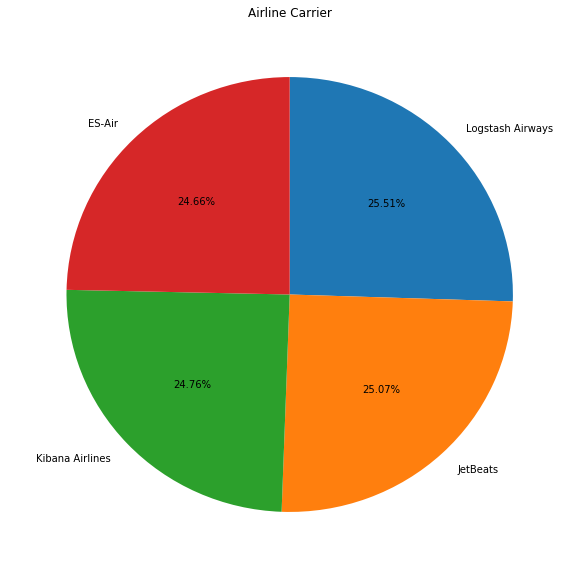

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.pie(carriers.values, labels=carriers.index, autopct='%1.2f%%', counterclock=False, startangle=90)
plt.title('Airline Carrier')

对照Kibana
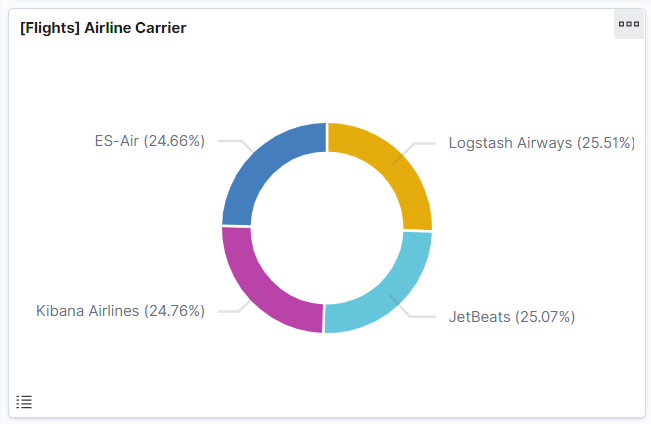

In [19]:
result_avgticketprice = timedf.resample('12H')['AvgTicketPrice'].mean()

In [20]:
result_flightcount = timedf.resample('12H').size()

In [21]:
timedf[timedf['Cancelled'] == True].resample('12H').size()

timestamp
2019-09-30 00:00:00    23
2019-09-30 12:00:00    19
2019-10-01 00:00:00    12
2019-10-01 12:00:00    17
2019-10-02 00:00:00    20
2019-10-02 12:00:00    22
2019-10-03 00:00:00    24
2019-10-03 12:00:00    21
2019-10-04 00:00:00    21
2019-10-04 12:00:00    17
2019-10-05 00:00:00    22
2019-10-05 12:00:00    29
2019-10-06 00:00:00     7
2019-10-06 12:00:00     8
2019-10-07 00:00:00    23
2019-10-07 12:00:00    22
2019-10-08 00:00:00    30
2019-10-08 12:00:00    23
2019-10-09 00:00:00    15
2019-10-09 12:00:00    18
2019-10-10 00:00:00    25
2019-10-10 12:00:00     9
2019-10-11 00:00:00    26
2019-10-11 12:00:00    26
2019-10-12 00:00:00    21
2019-10-12 12:00:00    16
2019-10-13 00:00:00    19
2019-10-13 12:00:00    12
2019-10-14 00:00:00    17
2019-10-14 12:00:00    23
                       ..
2019-10-27 00:00:00    19
2019-10-27 12:00:00    13
2019-10-28 00:00:00    24
2019-10-28 12:00:00    16
2019-10-29 00:00:00    22
2019-10-29 12:00:00    25
2019-10-30 00:00:00    17
20

In [22]:
timedf[timedf['FlightDelay'] == True].resample('12H').size()

timestamp
2019-09-30 00:00:00    43
2019-09-30 12:00:00    32
2019-10-01 00:00:00    34
2019-10-01 12:00:00    33
2019-10-02 00:00:00    40
2019-10-02 12:00:00    46
2019-10-03 00:00:00    39
2019-10-03 12:00:00    42
2019-10-04 00:00:00    34
2019-10-04 12:00:00    53
2019-10-05 00:00:00    37
2019-10-05 12:00:00    38
2019-10-06 00:00:00    36
2019-10-06 12:00:00    24
2019-10-07 00:00:00    46
2019-10-07 12:00:00    47
2019-10-08 00:00:00    54
2019-10-08 12:00:00    36
2019-10-09 00:00:00    30
2019-10-09 12:00:00    42
2019-10-10 00:00:00    39
2019-10-10 12:00:00    35
2019-10-11 00:00:00    43
2019-10-11 12:00:00    32
2019-10-12 00:00:00    36
2019-10-12 12:00:00    43
2019-10-13 00:00:00    38
2019-10-13 12:00:00    22
2019-10-14 00:00:00    40
2019-10-14 12:00:00    36
                       ..
2019-10-27 00:00:00    30
2019-10-27 12:00:00    34
2019-10-28 00:00:00    49
2019-10-28 12:00:00    55
2019-10-29 00:00:00    44
2019-10-29 12:00:00    37
2019-10-30 00:00:00    42
20

In [23]:
timedf[timedf['Cancelled'] == True].resample('12H').size() + timedf[timedf['FlightDelay'] == True].resample('12H').size()

timestamp
2019-09-30 00:00:00    66
2019-09-30 12:00:00    51
2019-10-01 00:00:00    46
2019-10-01 12:00:00    50
2019-10-02 00:00:00    60
2019-10-02 12:00:00    68
2019-10-03 00:00:00    63
2019-10-03 12:00:00    63
2019-10-04 00:00:00    55
2019-10-04 12:00:00    70
2019-10-05 00:00:00    59
2019-10-05 12:00:00    67
2019-10-06 00:00:00    43
2019-10-06 12:00:00    32
2019-10-07 00:00:00    69
2019-10-07 12:00:00    69
2019-10-08 00:00:00    84
2019-10-08 12:00:00    59
2019-10-09 00:00:00    45
2019-10-09 12:00:00    60
2019-10-10 00:00:00    64
2019-10-10 12:00:00    44
2019-10-11 00:00:00    69
2019-10-11 12:00:00    58
2019-10-12 00:00:00    57
2019-10-12 12:00:00    59
2019-10-13 00:00:00    57
2019-10-13 12:00:00    34
2019-10-14 00:00:00    57
2019-10-14 12:00:00    59
                       ..
2019-10-27 00:00:00    49
2019-10-27 12:00:00    47
2019-10-28 00:00:00    73
2019-10-28 12:00:00    71
2019-10-29 00:00:00    66
2019-10-29 12:00:00    62
2019-10-30 00:00:00    59
20

In [24]:
result_delays_cancellations = (timedf[(timedf['Cancelled']) | (timedf['FlightDelay'])].resample('12H').size()) / timedf.resample('12H').size()

In [25]:
result_delays_cancellations

timestamp
2019-09-30 00:00:00    0.354651
2019-09-30 12:00:00    0.275449
2019-10-01 00:00:00    0.287671
2019-10-01 12:00:00    0.302632
2019-10-02 00:00:00    0.352564
2019-10-02 12:00:00    0.352941
2019-10-03 00:00:00    0.366667
2019-10-03 12:00:00    0.329480
2019-10-04 00:00:00    0.319018
2019-10-04 12:00:00    0.375000
2019-10-05 00:00:00    0.308571
2019-10-05 12:00:00    0.356725
2019-10-06 00:00:00    0.319672
2019-10-06 12:00:00    0.326087
2019-10-07 00:00:00    0.382353
2019-10-07 12:00:00    0.355932
2019-10-08 00:00:00    0.443182
2019-10-08 12:00:00    0.346154
2019-10-09 00:00:00    0.259740
2019-10-09 12:00:00    0.354037
2019-10-10 00:00:00    0.354430
2019-10-10 12:00:00    0.304965
2019-10-11 00:00:00    0.331522
2019-10-11 12:00:00    0.357616
2019-10-12 00:00:00    0.345912
2019-10-12 12:00:00    0.335294
2019-10-13 00:00:00    0.439655
2019-10-13 12:00:00    0.317308
2019-10-14 00:00:00    0.329412
2019-10-14 12:00:00    0.337278
                         ...  

Text(0.5,1,'Flight Count')

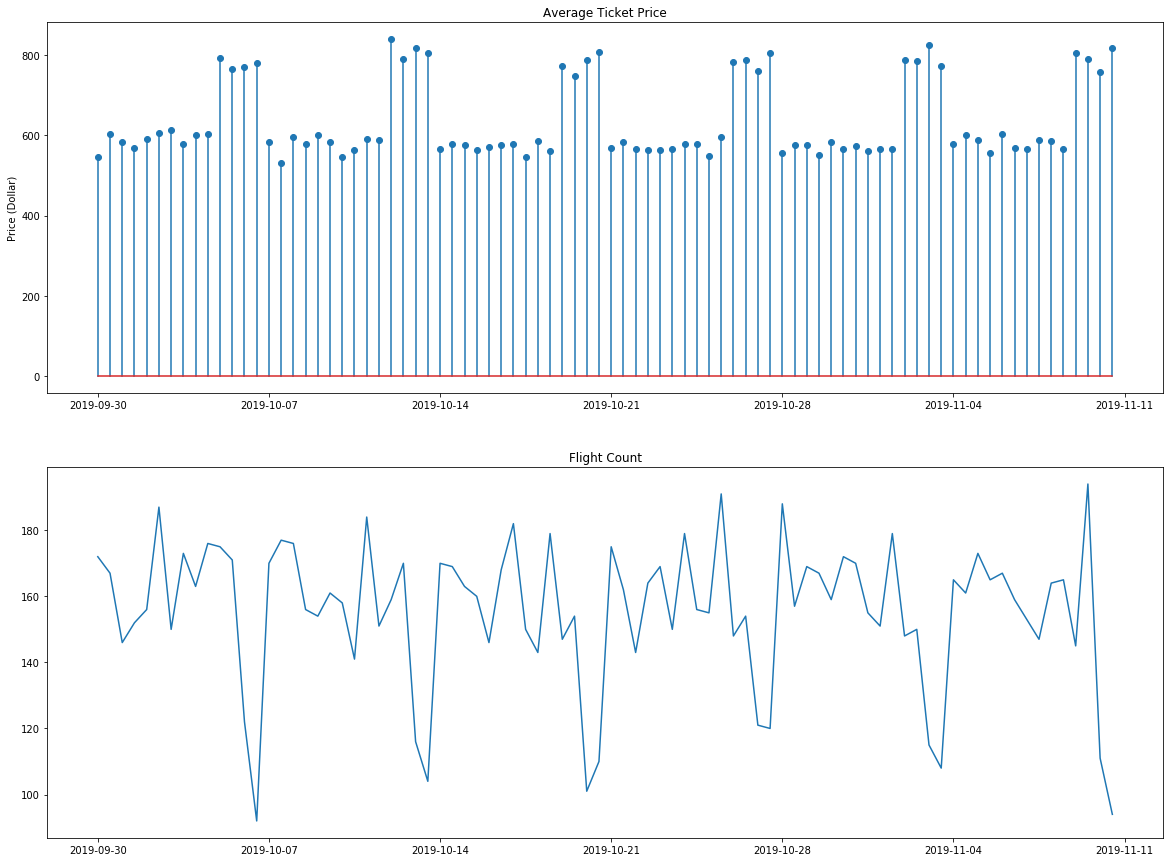

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].stem(result_avgticketprice.index, result_avgticketprice.values)
axes[0].set_title('Average Ticket Price')
axes[0].set_ylabel('Price (Dollar)')
axes[1].plot(result_flightcount.index, result_flightcount.values)
axes[1].set_title('Flight Count')

对照Kibana
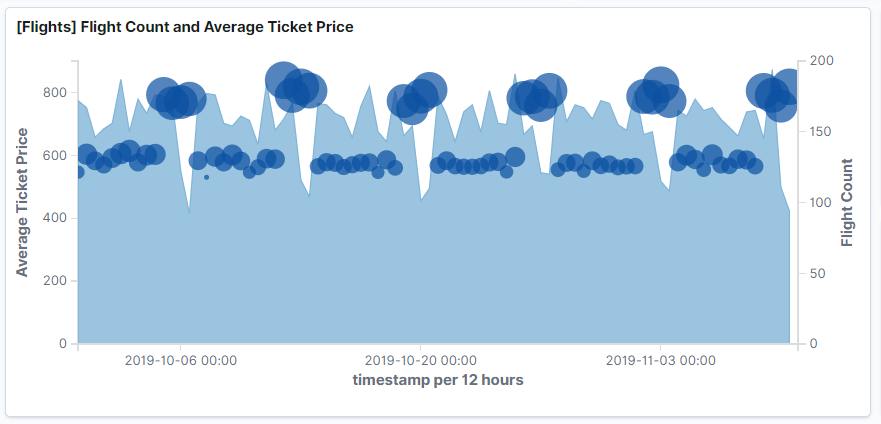

Text(0.5,1,'Flight Delay Type')

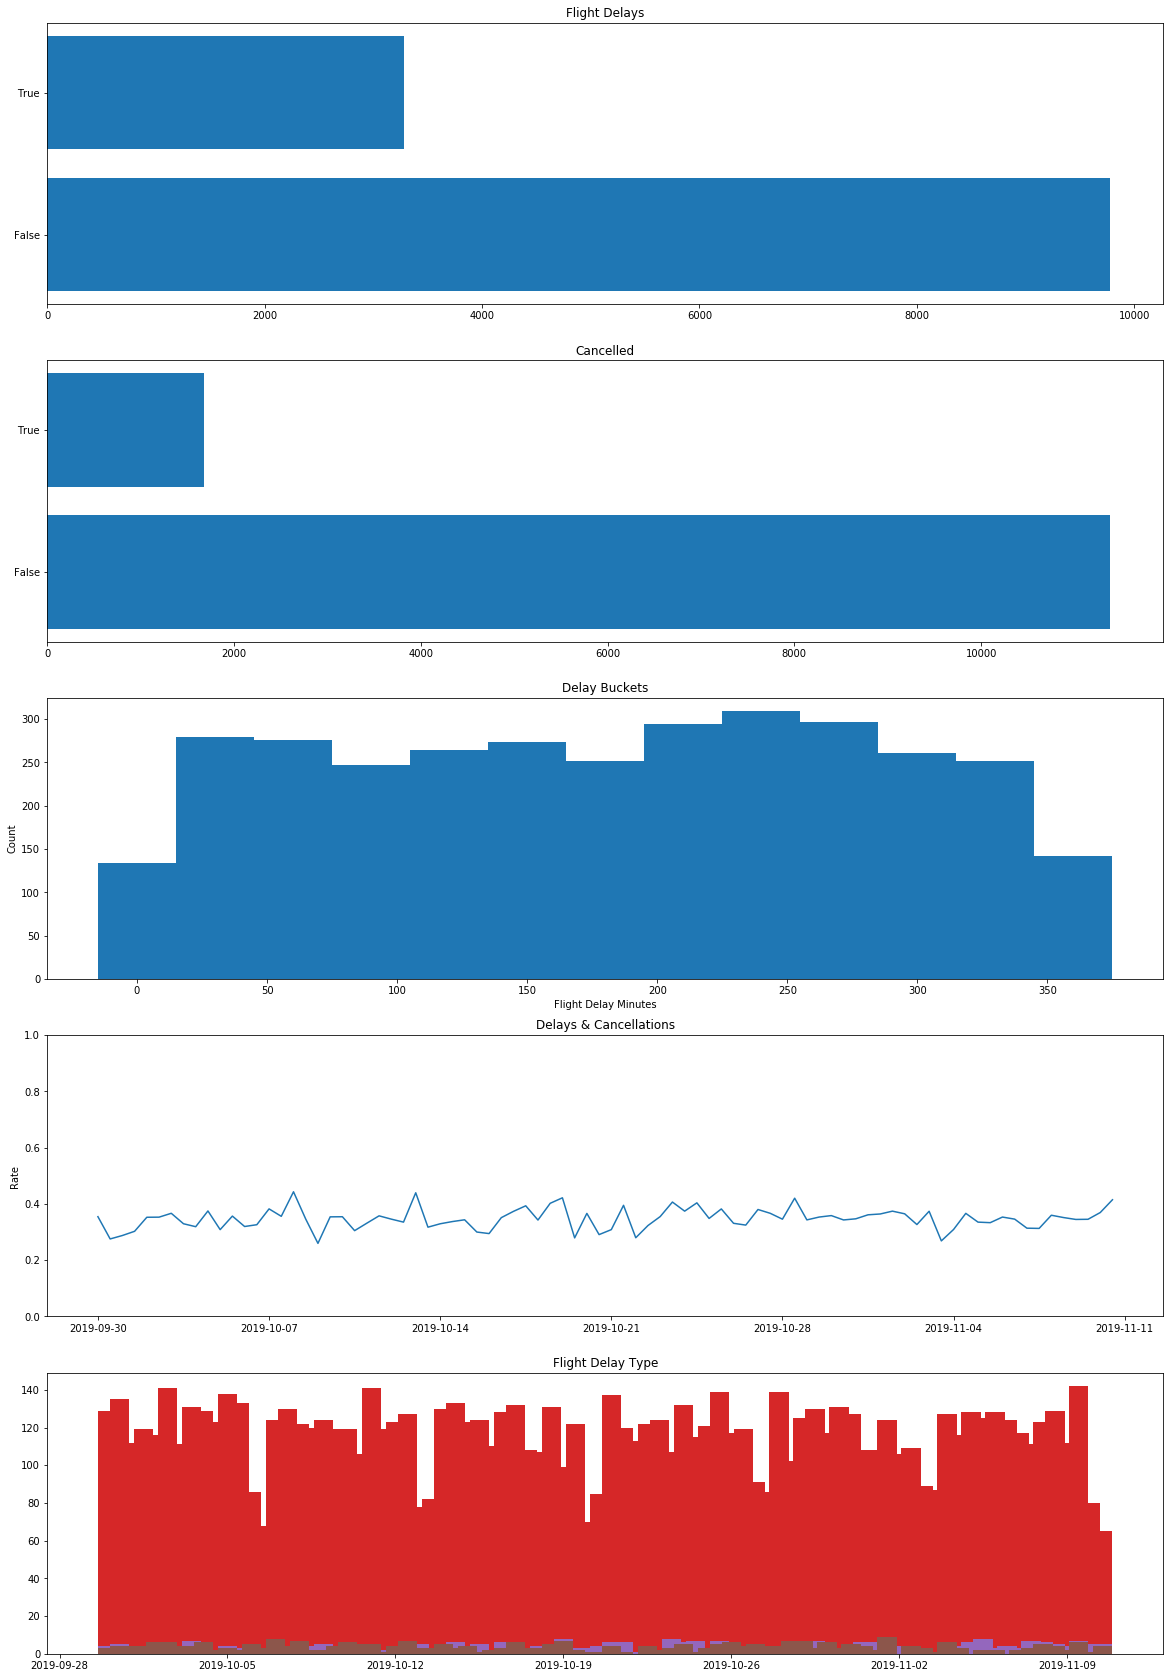

In [27]:
fig, axes = plt.subplots(5, 1, figsize=(20, 30))
axes[0].barh(timedf.groupby(by='FlightDelay').size().index, timedf.groupby(by='FlightDelay').size().values, align='center')
axes[0].set_yticks(np.arange(len(timedf.groupby(by='FlightDelay').size())))
axes[0].set_yticklabels(timedf.groupby(by='FlightDelay').size().index)
axes[0].set_title('Flight Delays')
axes[1].barh(timedf.groupby(by='Cancelled').size().index, timedf.groupby(by='Cancelled').size().values, align='center')
axes[1].set_yticks(np.arange(len(timedf.groupby(by='Cancelled').size())))
axes[1].set_yticklabels(timedf.groupby(by='Cancelled').size().index)
axes[1].set_title('Cancelled')
axes[2].hist(timedf[timedf['FlightDelay'] == True]['FlightDelayMin'], bins=np.arange(0, timedf['FlightDelayMin'].max()+60, 30), align='left')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Flight Delay Minutes')
axes[2].set_title('Delay Buckets')
axes[3].plot(result_delays_cancellations.index, result_delays_cancellations.values, scaley=False)
axes[3].set_ylabel('Rate')
axes[3].set_title('Delays & Cancellations')
for type in timedf.groupby(by=['FlightDelayType']).resample('12H').size().index:
    axes[4].bar(timedf.groupby(by=['FlightDelayType']).resample('12H').size().columns, timedf.groupby(by=['FlightDelayType']).resample('12H').size().loc[type].values)
axes[4].set_title('Flight Delay Type')

对照Kibana
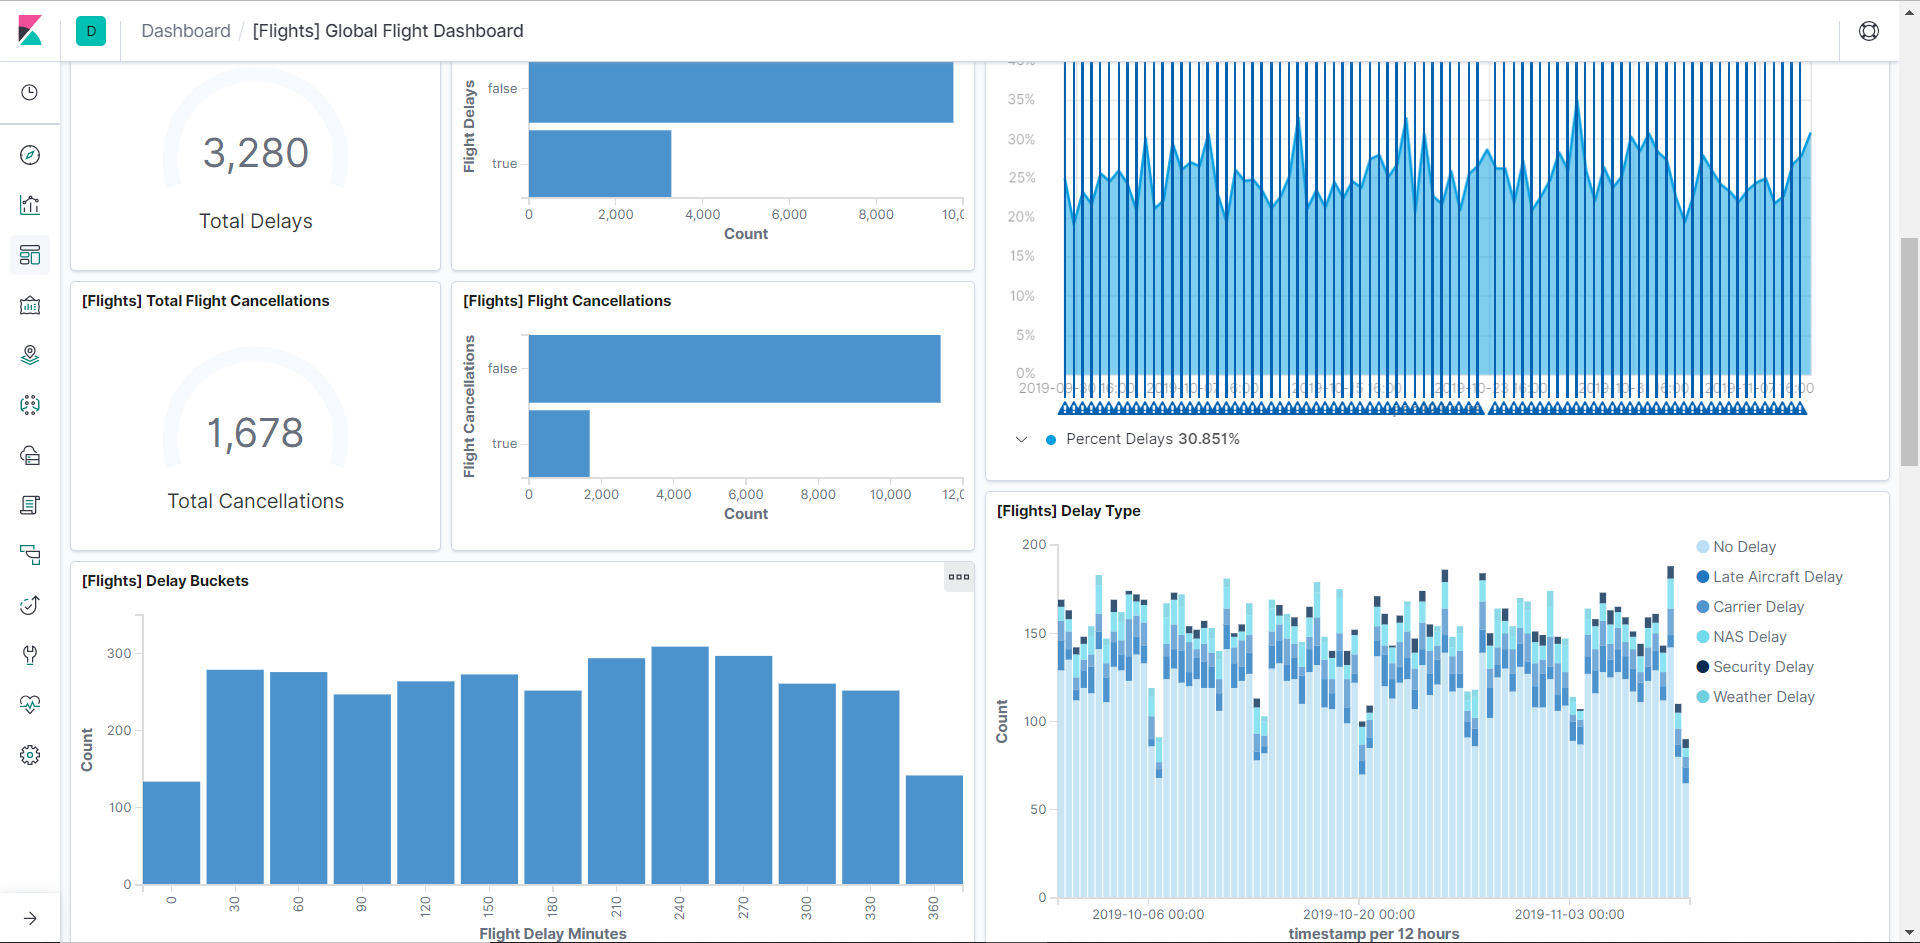

In [28]:
data_dest_origin = timedf.groupby(['OriginCountry', 'DestCountry']).size()

In [29]:
data_dest_origin

OriginCountry  DestCountry
AE             AE               9
               AR              10
               AT               3
               AU               6
               CA              20
               CH               8
               CL               2
               CN              23
               CO               8
               DE              16
               DK               4
               EC              10
               ES               5
               FI               4
               FR               5
               GB              14
               IE               6
               IN               6
               IT              62
               JP              25
               KR              12
               MX               5
               NL               2
               NO               6
               PE               6
               PL               6
               PR               2
               RU               8
               SE    

In [30]:
data_dest_origin = data_dest_origin.reindex(timedf['OriginCountry'].value_counts().index, level=0).reindex(timedf['DestCountry'].value_counts().index, level=1)

In [31]:
data_dest_origin

OriginCountry  DestCountry
IT             IT             459
               US             328
               CN             195
               CA             192
               JP             122
               RU             117
               CH             105
               GB              78
               AU              54
               PL              97
               AT              72
               IN              63
               AR              58
               ZA              50
               DE              53
               SE              29
               EC              30
               KR              41
               NO              21
               PR              21
               MX              20
               CO              19
               PE              11
               FI              12
               DK               9
               AE               9
               CL               8
               IE               3
               FR    

In [32]:
data_dest_origin.unstack().values[:5, :7]

array([[459., 328., 195., 192., 122., 117., 105.],
       [379., 322., 185., 147., 124., 128.,  93.],
       [192., 117.,  54.,  43.,  63.,  46.,  26.],
       [116.,  91., 117.,  37.,  37.,  39.,  82.],
       [101.,  94.,  83.,  73.,  32.,  32.,  51.]])

In [33]:
timedf['OriginCountry'].value_counts().index

Index(['IT', 'US', 'JP', 'CN', 'CA', 'DE', 'IN', 'AU', 'GB', 'KR', 'RU', 'AE',
       'ZA', 'EC', 'AR', 'CO', 'ES', 'FR', 'CH', 'PR', 'CL', 'MX', 'DK', 'NL',
       'SE', 'TR', 'FI', 'AT', 'NO', 'IE', 'PE', 'PL'],
      dtype='object')

Text(0.5,1,'Origin Country vs. Destination Country')

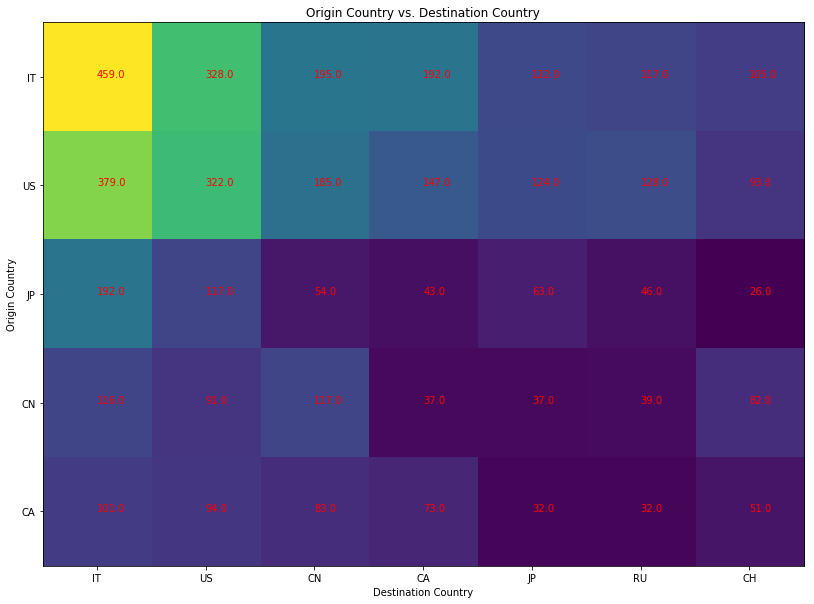

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(data_dest_origin.unstack().values[:5, :7])
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(timedf['DestCountry'].value_counts().index[:7])
ax.set_yticklabels(timedf['OriginCountry'].value_counts().index[:5])
ax.set_xlabel('Destination Country')
ax.set_ylabel('Origin Country')
for i in range(5):
    for j in range(7):
        text = ax.text(j, i, data_dest_origin.unstack().values[i, j], color='r')
ax.set_title('Origin Country vs. Destination Country')

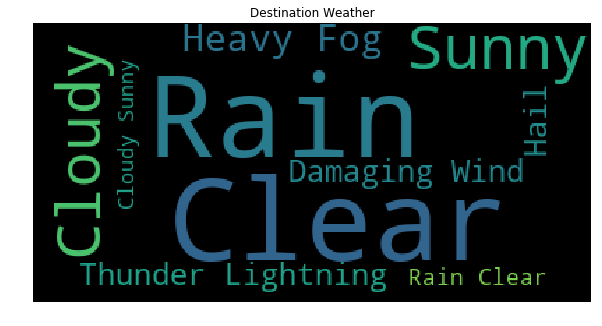

In [35]:
wc_weather = wordcloud.WordCloud()
wc_weather.generate(' '.join(timedf['DestWeather']))
plt.figure(figsize=(10, 6))
plt.imshow(wc_weather)
plt.axis('off')
plt.title('Destination Weather')
plt.show()

对照Kibana
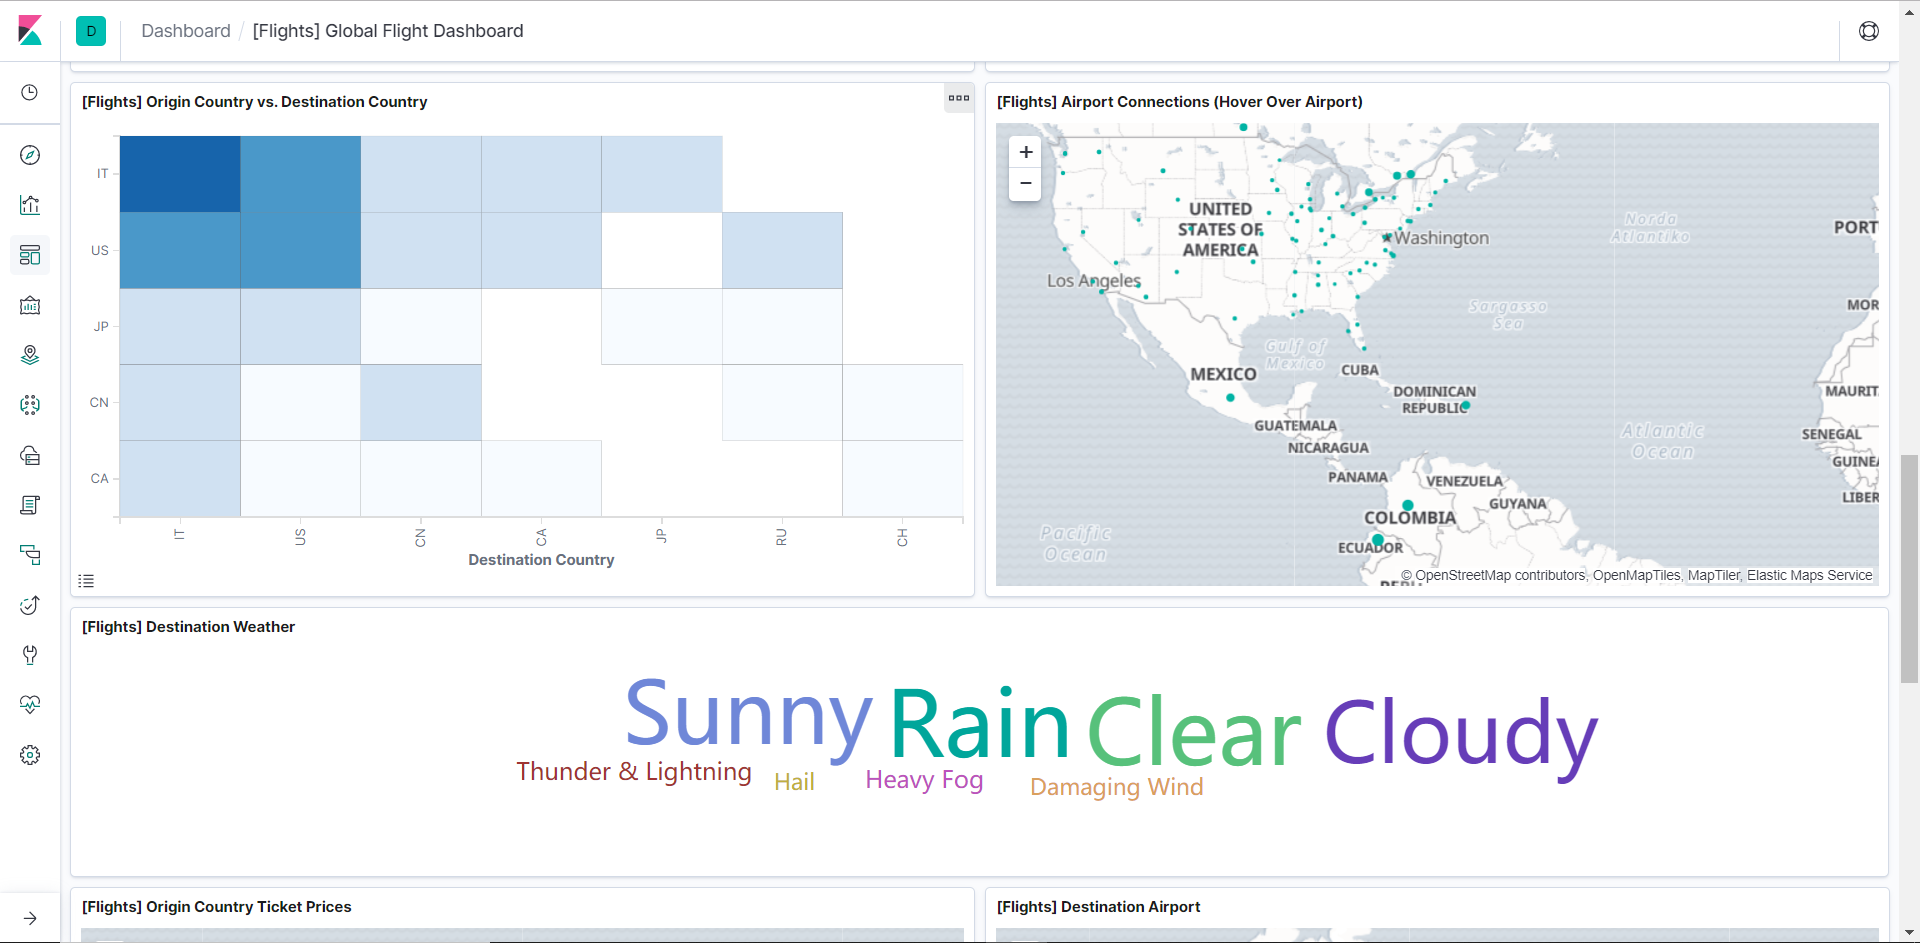